In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
bike_data = pd.read_csv('day.csv')

# Display the first 5 rows of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
len(bike_data)

730

In [4]:
bike_data.shape

(730, 16)

In [5]:
# Data Exploration and Cleaning
# Understanding the data types of columns
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Convert 'dteday' to datetime 
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'], format="%d-%m-%Y")

In [7]:
bike_data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [8]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Map categorical variables as per data dictionary
bike_data['season'] = bike_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow + Rain', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
bike_data['mnth'] = bike_data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
bike_data['weekday'] = bike_data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

In [10]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bike_data['weathersit'].value_counts()

weathersit
Clear                463
Mist + Cloudy        246
Light Snow + Rain     21
Name: count, dtype: int64

In [12]:
bike_data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [13]:
bike_data['weekday'].value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [14]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Dropping Columns

In [15]:
# Drop 'casual' and 'registered' and 'instant' columns
bike_data = bike_data.drop(['casual', 'registered','instant'], axis=1)

# Outliers check

In [16]:
# Function to detect outliers using IQR and return columns with outliers
def columns_with_outliers(bike_data):
    outlier_columns = []
    for column in bike_data.select_dtypes(include=['number']).columns:
        Q1 = bike_data[column].quantile(0.25)
        Q3 = bike_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if any((bike_data[column] < lower_bound) | (bike_data[column] > upper_bound)):
            outlier_columns.append(column)
    return outlier_columns

# Get columns with outliers
outlier_columns = columns_with_outliers(bike_data)

# Print columns with outliers
print("Columns with outliers:")
print(outlier_columns)

Columns with outliers:
['holiday', 'hum', 'windspeed']


In [17]:
# Function to calculate upper bound for columns with outliers using IQR
def calculate_upper_bound(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

# Get upper bound values for columns with outliers
outlier_columns_upper_bounds = {}
for column in bike_data.select_dtypes(include=['number']).columns:
    Q1 = bike_data[column].quantile(0.25)
    Q3 = bike_data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = calculate_upper_bound(bike_data, column)
    outliers = bike_data[bike_data[column] > upper_bound][column]
    if not outliers.empty:
        outlier_columns_upper_bounds[column] = upper_bound

# Print columns with outliers and their upper bound values
for column, upper_bound in outlier_columns_upper_bounds.items():
    print(f"Column '{column}': Upper Bound = {upper_bound}")

Column 'holiday': Upper Bound = 0.0
Column 'windspeed': Upper Bound = 25.501498125


In [18]:
#No of values above Q3 + 1.5 * IQR for the columns having an outlier
outlier_windspeed = bike_data[bike_data['windspeed'] > 25.501498125]
print(len(outlier_windspeed))

13


In [19]:
#Outliers might affect the overall analysis and hence we need to treat them , 
#replacing them with median is a good option for now
# Function to replace outliers with median using IQR
def replace_outliers_with_median(bike_data):
    Q1 = bike_data.quantile(0.25)
    Q3 = bike_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with the median of the column
    bike_data = bike_data.apply(lambda x: bike_data.median() if x < lower_bound or x > upper_bound else x)
    return bike_data

In [20]:
# Choose the column for which you want to replace outliers with median
column_name = 'windspeed'  


# Replace outliers with median 
bike_data[column_name] = replace_outliers_with_median(bike_data[column_name])

In [21]:
len(bike_data)

730

In [22]:
#Basic Univariate analysis

In [23]:
#Creating a function to Plot relationship between multiple independent varaibles and the dependant variable
def plot_bar_chart(x_var, y_var):
    """
    Plot a bar chart with specified x and y variables.

    Parameters:
        x_var (str): Name of the variable to be plotted on the x-axis.
        y_var (str): Name of the variable to be plotted on the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x=x_var, y=y_var, data=bike_data)
    plt.title(f'Bar Chart: {y_var} across {x_var}', fontsize=14)
    plt.xlabel(x_var.capitalize(), fontsize=12)
    plt.ylabel(y_var.capitalize(), fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

In [24]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


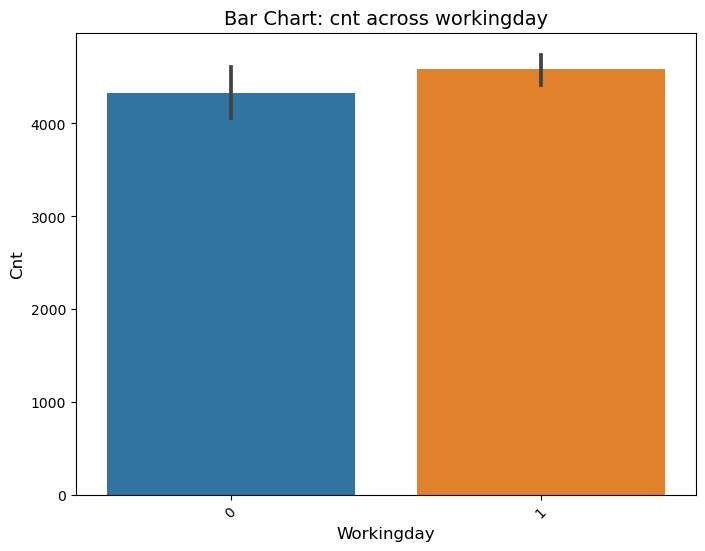

In [25]:
plot_bar_chart('workingday','cnt')

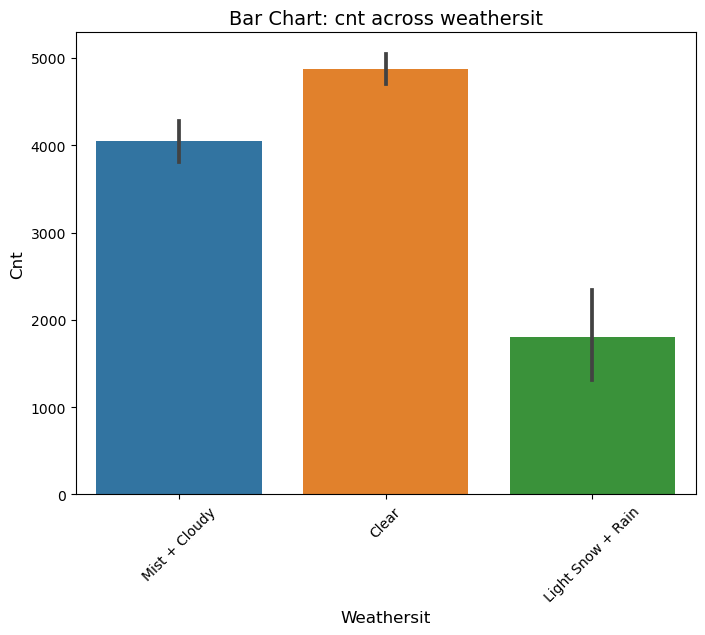

In [26]:
plot_bar_chart('weathersit','cnt')

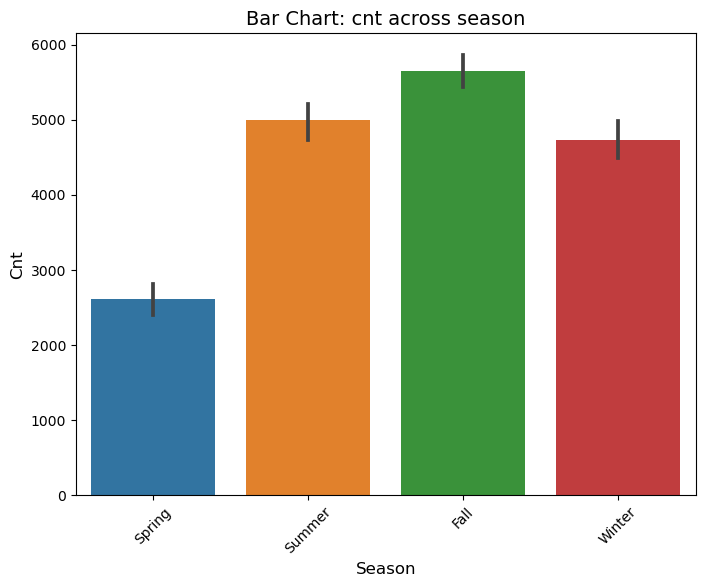

In [27]:
plot_bar_chart('season','cnt')

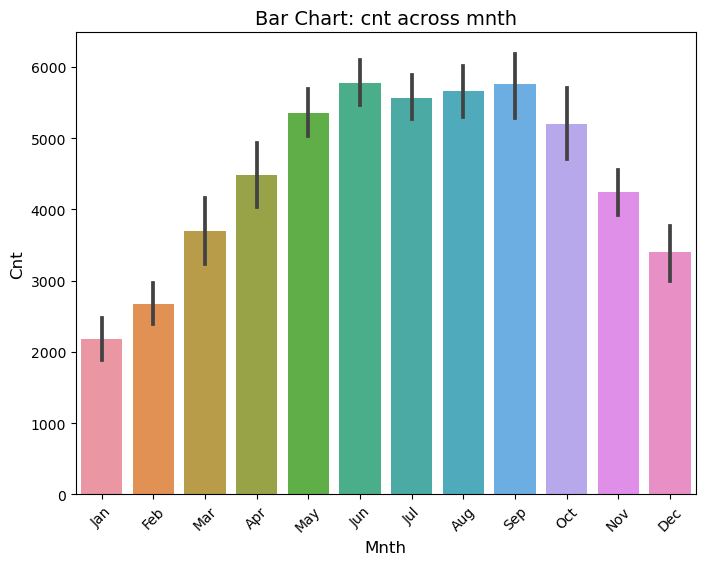

In [28]:
plot_bar_chart('mnth','cnt')

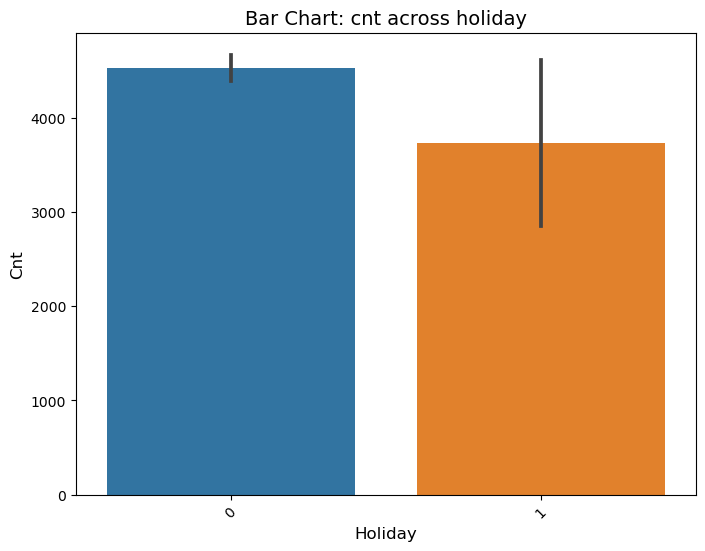

In [29]:
plot_bar_chart('holiday','cnt')

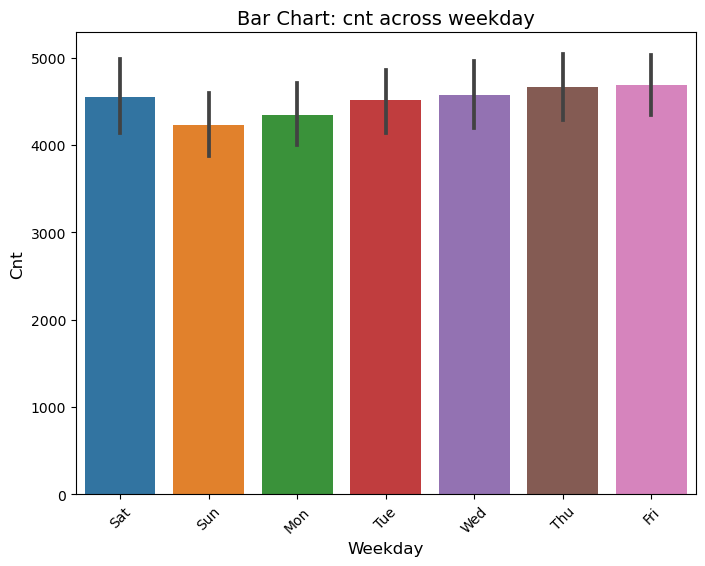

In [30]:
plot_bar_chart('weekday','cnt')

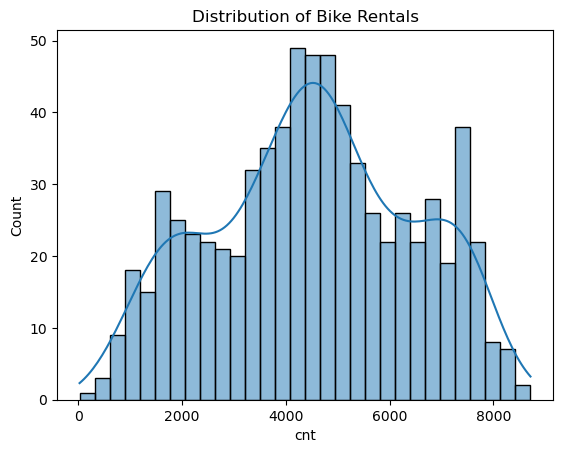

In [31]:
# Univariate Analysis
# Plot distribution of the target variable 'cnt'
sns.histplot(bike_data['cnt'], bins=30, kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()

In [32]:
bike_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-01-02,Spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-01-03,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-01-04,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-01-05,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


/Users/sammy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


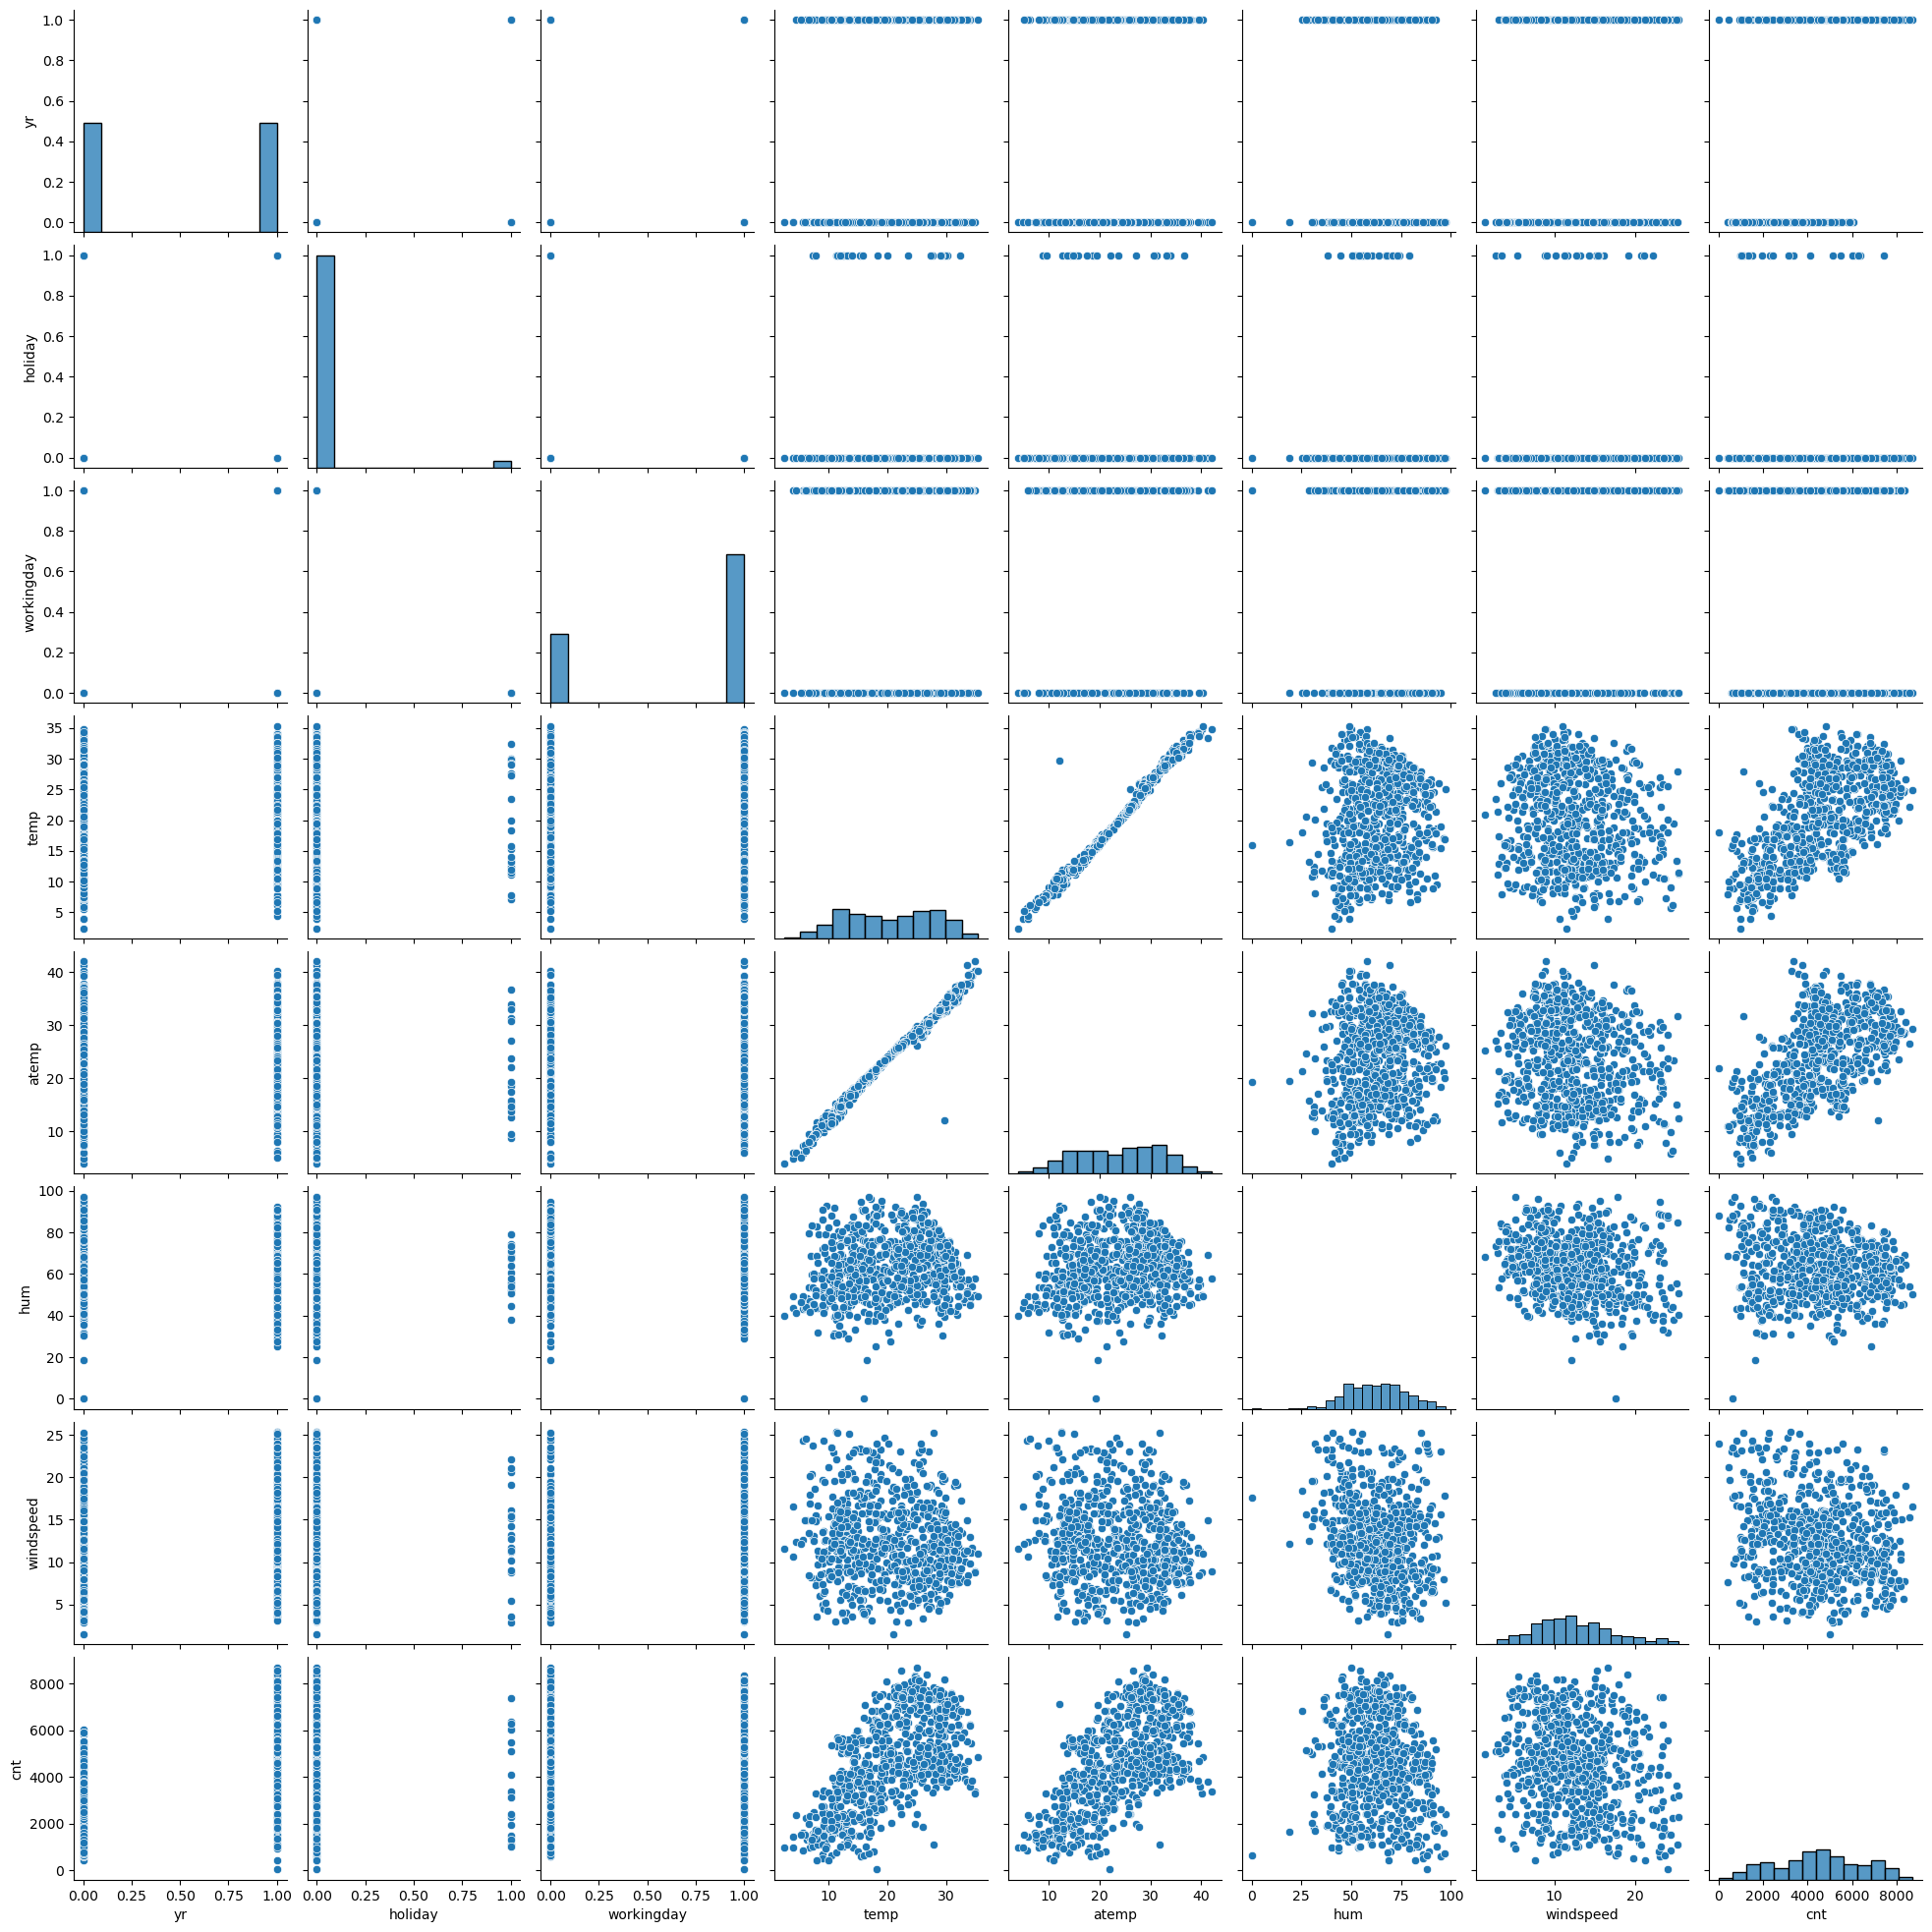

In [33]:
#pair plots
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of numerical variables
sns.pairplot(bike_data)
plt.show()

/Users/sammy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


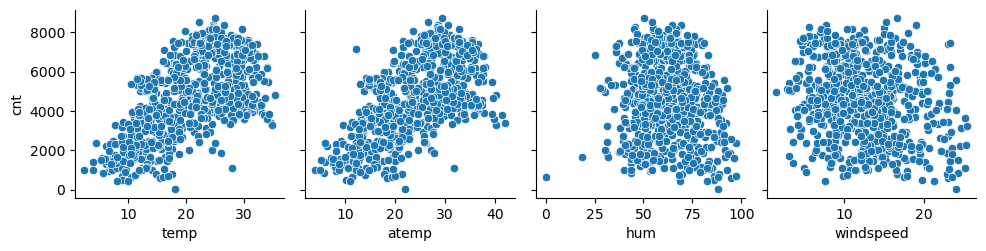


Correlation with Dependent Variable:
cnt          1.000000
atemp        0.630685
temp         0.627044
hum         -0.098543
windspeed   -0.216045
Name: cnt, dtype: float64


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dependent_variable = 'cnt'

# Selecting independent variables
independent_variables = ['temp', 'atemp', 'hum', 'windspeed']

# Creating a pairplot for visualization
sns.pairplot(bike_data, x_vars=independent_variables, y_vars=dependent_variable, kind='scatter')
plt.show()

# Calculating correlation coefficients
correlations = bike_data[independent_variables + [dependent_variable]].corr()


# Displaying correlation coefficients with the dependent variable
print("\nCorrelation with Dependent Variable:")
print(correlations[dependent_variable].sort_values(ascending=False))


/Users/sammy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


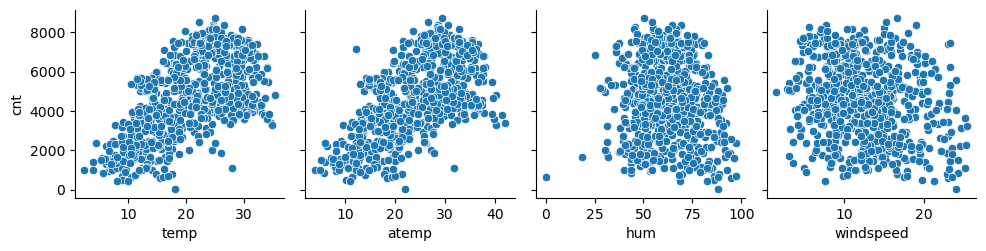

In [35]:
# Bivariate Analysis
# Explore relationship between numerical variables and 'cnt'
sns.pairplot(bike_data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', kind='scatter')
plt.show()

In [36]:
# Create dummy variables for categorical columns with more than 2 categories
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True, dtype=np.int64)

In [37]:
bike_data.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2018-01-02,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2018-01-03,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2018-01-04,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2018-01-05,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


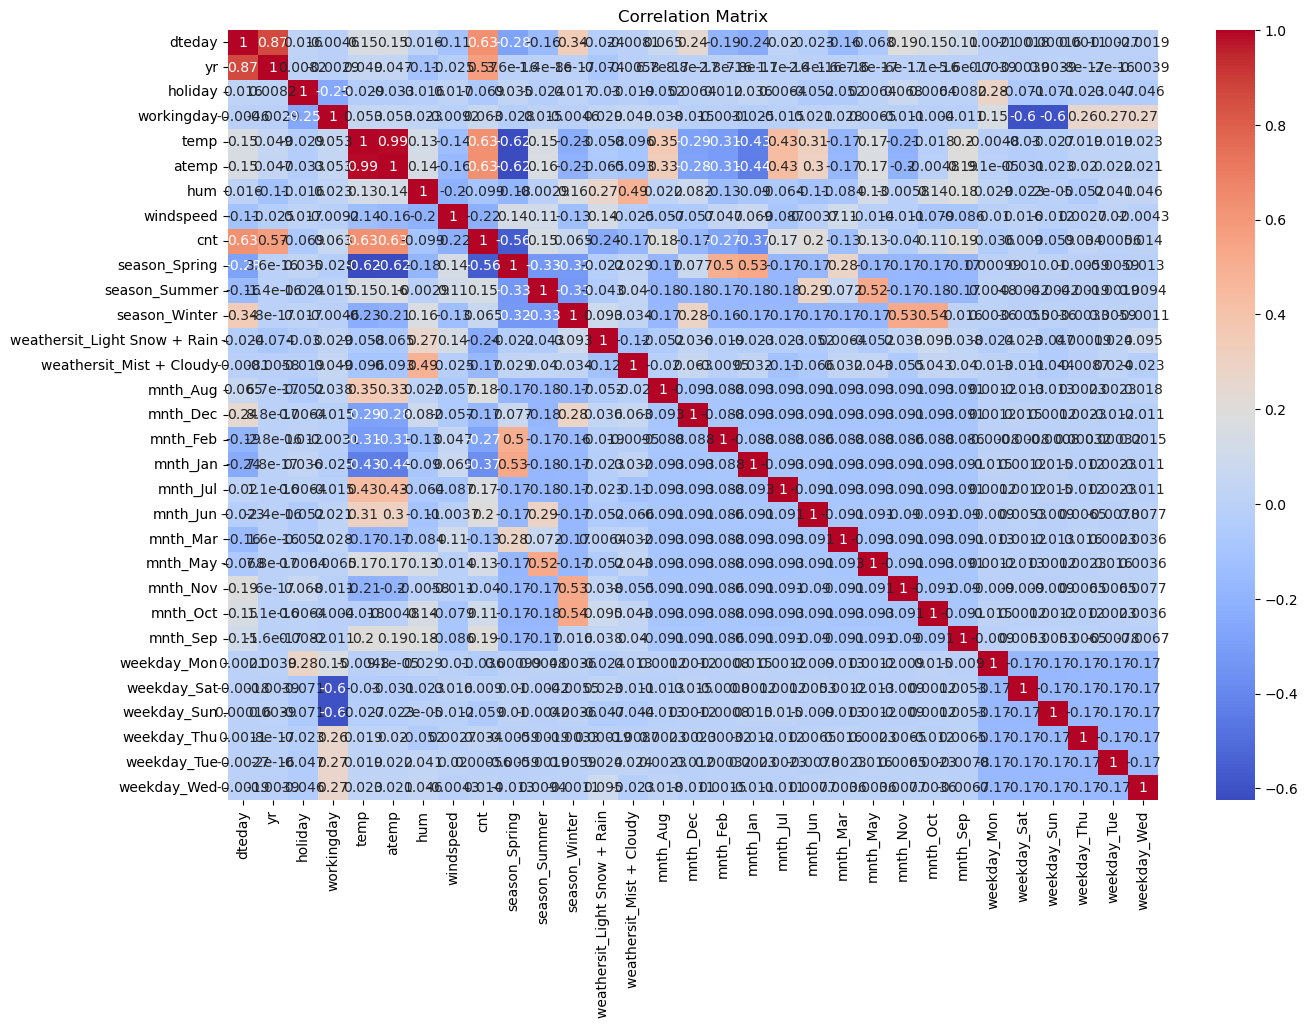

In [38]:
# Multivariate Analysis
# Heatmap for correlation matrix
correlation_matrix = bike_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# missing values check
bike_data.isnull().sum()

# No missing values found, so no imputation needed

dteday                          0
yr                              0
holiday                         0
workingday                      0
temp                            0
atemp                           0
hum                             0
windspeed                       0
cnt                             0
season_Spring                   0
season_Summer                   0
season_Winter                   0
weathersit_Light Snow + Rain    0
weathersit_Mist + Cloudy        0
mnth_Aug                        0
mnth_Dec                        0
mnth_Feb                        0
mnth_Jan                        0
mnth_Jul                        0
mnth_Jun                        0
mnth_Mar                        0
mnth_May                        0
mnth_Nov                        0
mnth_Oct                        0
mnth_Sep                        0
weekday_Mon                     0
weekday_Sat                     0
weekday_Sun                     0
weekday_Thu                     0
weekday_Tue   

In [40]:
# Train-Test Split
X = bike_data.drop(['cnt', 'dteday'], axis=1)
y = bike_data['cnt']

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
247,0,1,0,27.606653,31.28230,79.0417,14.250632,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
335,0,0,1,12.880847,16.57165,62.5833,6.750518,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
440,1,0,0,21.080847,25.25230,75.5833,7.417168,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
136,0,0,1,23.028347,26.92645,83.7917,18.582718,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [43]:
X_train.shape

(584, 29)

In [44]:
import statsmodels.api as sm

def backward_elimination_pvalue(X, y, significance_level=0.05):
    while True:
        # Combine the target variable and the feature matrix
        data_combined = pd.concat([y, X], axis=1)
        
        # Fit the model
        model = sm.OLS(data_combined.iloc[:, 0], sm.add_constant(data_combined.iloc[:, 1:])).fit()
        
        # Get p-values for each feature
        p_values = model.pvalues[1:]  # Exclude the constant term
        
        # Find the feature with the highest p-value
        max_p_value = p_values.max()
        max_p_value_feature = p_values.idxmax()
        
        # Check if the highest p-value is above the significance level
        if max_p_value > significance_level:
            # Remove the feature with the highest p-value
            X = X.drop(columns=[max_p_value_feature])
        else:
            # If all p-values are below the significance level, break the loop
            break
    
    return X

# Example usage:
# Assume X_train_vif_eliminated and y_train are your feature matrix and target variable after VIF elimination
X_train_after_pvalue_elimination = backward_elimination_pvalue(X_train, y_train)

# Display the final selected features
print("Selected Features after p-value elimination:", X_train_after_pvalue_elimination.columns)


Selected Features after p-value elimination: Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Light Snow + Rain',
       'weathersit_Mist + Cloudy', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Mon', 'weekday_Sat'],
      dtype='object')


In [45]:
X_train_after_pvalue_elimination.shape

(584, 17)

In [46]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [47]:
X_train_after_pvalue_elimination.head()

,yr,workingday,atemp,hum,windspeed,season_Spring,season_Winter,weathersit_Light Snow + Rain,weathersit_Mist + Cloudy,mnth_Dec,mnth_Jul,mnth_Mar,mnth_May,mnth_Nov,mnth_Sep,weekday_Mon,weekday_Sat
247,0,0,31.28230,79.0417,14.250632,0,0,0,1,0,0,0,0,0,1,1,0
335,0,1,16.57165,62.5833,6.750518,0,1,0,0,1,0,0,0,0,0,0,0
702,1,1,23.45270,73.3750,11.666643,0,1,0,0,1,0,0,0,0,0,0,0
440,1,0,25.25230,75.5833,7.417168,1,0,0,1,0,0,1,0,0,0,0,1
136,0,1,26.92645,83.7917,18.582718,0,0,0,1,0,0,0,1,0,0,0,0


In [48]:
X_train_after_pvalue_elimination.shape

(584, 17)

In [49]:
# Identify numerical columns
numerical_columns = X_train_after_pvalue_elimination.select_dtypes(include=['number']).columns.tolist()
numerical_columns

['yr',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'weathersit_Light Snow + Rain',
 'weathersit_Mist + Cloudy',
 'mnth_Dec',
 'mnth_Jul',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat']

In [50]:
selected_columns = X_train_after_pvalue_elimination.columns

In [51]:
selected_columns.shape

(17,)

In [52]:
original_feature_names = X_train[selected_columns].columns.tolist()
original_feature_names

['yr',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'weathersit_Light Snow + Rain',
 'weathersit_Mist + Cloudy',
 'mnth_Dec',
 'mnth_Jul',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat']

In [53]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_columns].select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test[selected_columns].select_dtypes(include=np.number))

In [54]:
X_train_scaled.shape

(584, 17)

In [55]:
#Feature Elimination using VIF with threshold 5
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_feature_elimination(X, vif_threshold=5):
    features_high_vif = True
    while features_high_vif:
        # Calculate VIF for each feature
        vif_data = np.zeros(X.shape[1])
        for i in range(X.shape[1]):
            vif_data[i] = variance_inflation_factor(X, i)

        # Find features with VIF above the threshold
        high_vif_indices = np.where(vif_data > vif_threshold)[0]

        if len(high_vif_indices) > 0:
            feature_to_remove_index = high_vif_indices[np.argmax(vif_data[high_vif_indices])]
            print(f"Removing feature with high VIF: {feature_to_remove_index}")
            X = np.delete(X, feature_to_remove_index, axis=1)
        else:
            features_high_vif = False

    return X


X_train_after_vif_elimination = vif_feature_elimination(X_train_scaled, vif_threshold=5)

In [56]:
X_train_after_vif_elimination.shape

(584, 17)

In [57]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

#Using Random Forest Regressor
estimator = RandomForestRegressor()

# Initializing RFECV with the chosen estimator and scoring metric

# rfecv = RFECV(estimator=estimator, scoring='r2', cv=5) 
rfecv = RFECV(estimator=estimator, scoring='neg_mean_squared_error', cv=5) 
# rfecv = RFECV(estimator=estimator, scoring='neg_mean_absolute_error', cv=5) 

# Fit RFECV to your data
X_train_rfecv = rfecv.fit_transform(X_train_after_vif_elimination, y_train)

# Create a DataFrame with selected features
X_train_rfecv_df = pd.DataFrame(X_train_rfecv, columns=[f'feature_{i}' for i in range(X_train_rfecv.shape[1])])

# Display the optimal number of features and the selected features
print("Optimal number of features: ", rfecv.n_features_)
print("Selected Features (RFECV):", X_train_rfecv_df.columns)

Optimal number of features:  15
Selected Features (RFECV): Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14'],
      dtype='object')


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm


# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_rfecv_df, y_train)

selected_features = X_train_rfecv_df.columns


selected_columns_indices = [i for i, col in enumerate(X_train_rfecv_df.columns) if col in selected_features]


X_test_selected = X_test_scaled[:, selected_columns_indices]


y_pred = model.predict(X_test_selected)


# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R-squared using the training set
n = X_train.shape[0]  # number of samples
p = X_train.shape[1]  # number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print the results
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)


R-squared (R2): 0.8237476255061642
Adjusted R-squared: 0.8145214181770645


/Users/sammy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8237476255061642

In [60]:
feature_names = X_train_rfecv_df.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

In [61]:
# Sort the DataFrame by the absolute values of coefficients in descending order
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
sorted_coefficients = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the top 3 features
top_3_features = sorted_coefficients.head(3)
print(top_3_features)

     Feature  Coefficient  Absolute_Coefficient
0  feature_0   989.955827            989.955827
2  feature_2   846.518745            846.518745
5  feature_5  -447.657876            447.657876


In [62]:
original_feature_names

['yr',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season_Spring',
 'season_Winter',
 'weathersit_Light Snow + Rain',
 'weathersit_Mist + Cloudy',
 'mnth_Dec',
 'mnth_Jul',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Sep',
 'weekday_Mon',
 'weekday_Sat']

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8237476255061642